In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, nsolve, log

In [5]:
U_G = 12.32 # Geostrophic velocity [m/s]
D = 154 # Rotor diameter [m]
z_h = 106 # hub height [m]
s_x = 10 # Streamwise distance [D]
s_y = 10 # Transverse distance [D]

delta_ibl_0 = z_h

C = 4.0 # Empirical constant [-]
C_star = 4.5 # Friction velocity constant [-]

f = 1*10**(-4) # Coriolis parameter [1/s]
k = 0.4 # Von Karman constant [-]

C_T = 0.84 # Thrust coefficient [-]
C_P = 0.4 # Power coefficient [-]

rho = 1.2 # Air density [kg/m^3]
z_0lo = 0.0001 # surface rughness length [m] 

In [6]:
c_ft = (np.pi * C_T)/(4*s_x*s_y)
print("Planform Thrust Coefficient: ", round(c_ft,3), "[-]")

v_w_star = 28 * np.sqrt(1/2*c_ft)
print("Eddy Viscosity: ", round(v_w_star,2), "[-]")

beta = v_w_star / (1 + v_w_star)
print("Wake Expansion Parameter: ", round(beta,2), "[-]")

Planform Thrust Coefficient:  0.007 [-]
Eddy Viscosity:  1.61 [-]
Wake Expansion Parameter:  0.62 [-]


In [7]:
z_0hi = z_h * (1 + D/(2 * z_h))**beta * np.exp(-(c_ft/(2 * k**2) + (np.log(z_h / z_0lo * (1 - D/(2 * z_h))**beta))**-2)**-0.5)
print("Effective Roughness Height: ", round(z_0hi, 4), "m")

u_star_lo = (k * U_G) / (np.log(U_G / (f * z_0lo)) - C_star)
print("Friction Velocity lo: ", round(u_star_lo, 4), "m/s")

u_star_hi = (k * U_G) / (np.log(U_G / (f * z_0hi)) - C_star)
print("Friction Velocity hi: ", round(u_star_hi, 4), "m/s")

Effective Roughness Height:  0.3177 m
Friction Velocity lo:  0.2999 m/s
Friction Velocity hi:  0.5889 m/s


In [8]:
U_h0 = u_star_lo / k * np.log(z_h / z_0lo)
print('Unperturbed Wind Speed: ', round(U_h0, 2), 'm/s')

U_hT = u_star_hi / k * np.log((z_h / z_0hi) * (1 + (D/(2*z_h)))**beta)
print('Wind Speed (fully developed): ', round(U_hT, 2), 'm/s')

Unperturbed Wind Speed:  10.4 m/s
Wind Speed (fully developed):  9.05 m/s


In [9]:
# ---------- Solve for H_G ----------

# Define variables
ibl_x, u_star_x = symbols('ibl_x u_star_x')

# Eq(LHS, RHS)
equation = Eq(u_star_x, u_star_lo * (log(ibl_x / z_0lo)) / (log(ibl_x / z_0hi)))

# Substitute u_star_x with u_star_hi
equation_substituted = equation.subs(u_star_x, u_star_hi)

# Solve for ibl_x
initial_guess = 1100
H_G = nsolve(equation_substituted, ibl_x, initial_guess)
print('ABL height at u*(x) = u*hi: ', int(H_G), 'm')

# -----------------------------------

# Define x values scaled by z_0hi
x = np.arange(z_0hi*0, 20000, 1)  # Distance in meters

# Calculate δ_ibl(x) / z_0hi (scaled internal boundary layer height)
ibl_x = delta_ibl_0 + z_0hi * (x / z_0hi) ** (4 / 5)
ibl_x[ibl_x >= H_G] = H_G  # Apply boundary limit

ABL height at u*(x) = u*hi:  1368 m


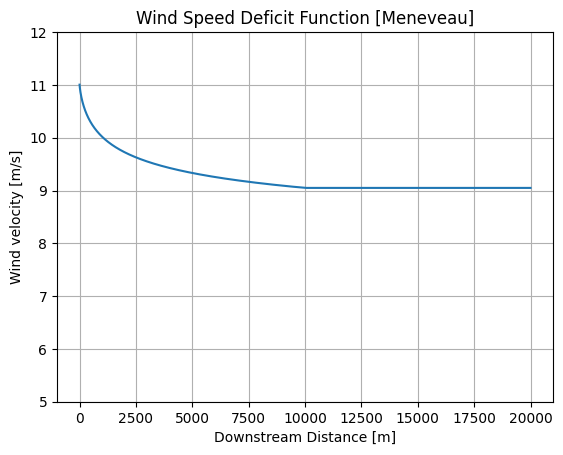

In [10]:
x_len = 20000
x = np.arange(0, x_len)

U_hT_x = (u_star_lo / k) * (np.log(ibl_x / z_0lo) / np.log(ibl_x / z_0hi)) * np.log((z_h / z_0hi) * (1 + D/(2 * z_h))**beta)

plt.plot(x, U_hT_x)
plt.xlabel('x')
plt.ylabel('Wind velocity [m/s]')
plt.xlabel('Downstream Distance [m]')
plt.title('Wind Speed Deficit Function [Meneveau]')
plt.ylim(5, 12)
plt.grid(True)
plt.show()